# Other Clustering Algorithms

In [1]:
from sklearn.datasets import load_iris, make_circles
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from pyclustering.cluster.somsc import somsc
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

iris = load_iris()

## Spectral Clustering

Spectral clustering uses the distance matrix to define the Laplacian Matrix and transform the dataset by eigendecomposition. The implementation of scikit-learn uses K-means for obtaining the clusters n the transformed dataset (also a 'discretization' method can be applied).

CPU times: user 266 ms, sys: 256 ms, total: 523 ms
Wall time: 375 ms
AMI= 0.7842528489695738


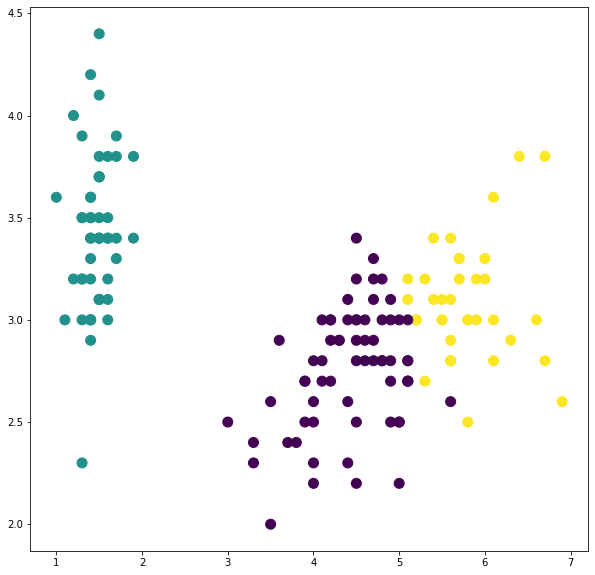

In [2]:
spec = SpectralClustering(n_clusters=3)
%time {spec.fit(iris['data'])}
labels = spec.fit_predict(iris['data'])
print("AMI=", adjusted_mutual_info_score(iris['target'], labels));
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100);

By default a RBF kernel is used to define the similarity matrix, but other possibilities like using the distances for only a number of neighbors or applying other kernel functions are possible. This makes this method related to Kernel K-means.

CPU times: user 41.7 ms, sys: 238 µs, total: 42 ms
Wall time: 223 ms
0.7765248491347204


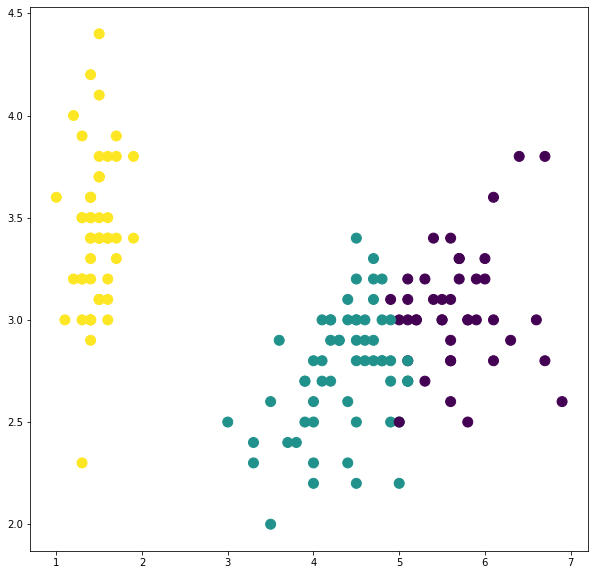

In [3]:
nn=30

spec = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=nn)
%time {spec.fit(iris['data'])}

labels = spec.fit_predict(iris['data'])
print(adjusted_mutual_info_score(iris['target'], labels))
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100);

Depending on the transformation and parameters, the method is able to find non linearly separable clusters, but it is not always the case. You can see what happens with higher number of neighbors.

AMI= 1.0


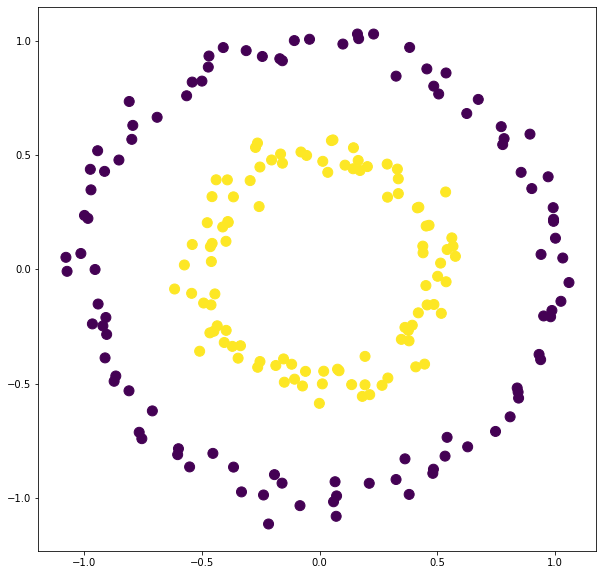

In [4]:
circles, clabels = make_circles(n_samples=200, factor=.5, noise=.05)

nn=10

spec = SpectralClustering(n_clusters=2, affinity="nearest_neighbors", n_neighbors=10)
labels = spec.fit_predict(circles)
print("AMI=", adjusted_mutual_info_score(clabels, labels)) 
plt.figure(figsize=(10,10))
plt.scatter(circles[:, 0], circles[:, 1], c=labels, s=100);

## Affinity Propagation

Affinity propagation is related to probabilistical graphical models and is controled only by a parameter, the *damping factor* that controls how many clusters appear (the lower (0.5) the more clusters) buy the exact number of clusters obtained is determined by the algorithm. This example uses damping factor 0.5.

CPU times: user 41.2 ms, sys: 94.4 ms, total: 136 ms
Wall time: 70.2 ms
Clusters= 7
AMI= 0.5171731623283142


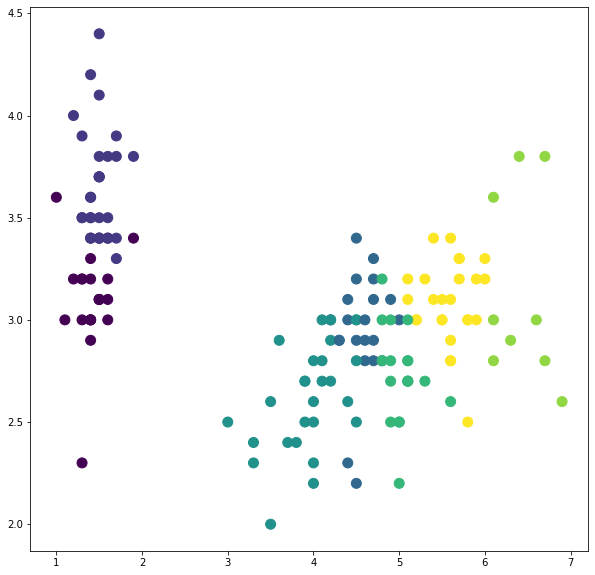

In [5]:
aff= AffinityPropagation(damping=0.5)
%time {aff.fit(iris['data'])}

labels = aff.predict(iris['data'])
print ('Clusters=', len(np.unique(labels)))
print("AMI=", adjusted_mutual_info_score(iris['target'], labels))
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100);

And now with damping factor 0.98 (a value of 1 does not returns clusters)

CPU times: user 160 ms, sys: 101 ms, total: 261 ms
Wall time: 125 ms
Clusters= 4
AMI= 0.6753193581954449


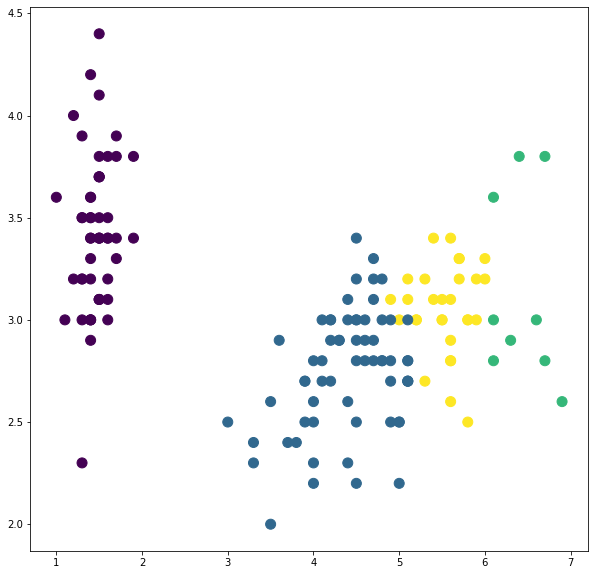

In [6]:
aff= AffinityPropagation(damping=0.98)
%time {aff.fit(iris['data'])}
labels = aff.predict(iris['data'])
print ('Clusters=', len(np.unique(labels)))
print("AMI=",adjusted_mutual_info_score(iris['target'], labels))
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100);

## Self organizing maps

CPU times: user 9.5 ms, sys: 192 µs, total: 9.69 ms
Wall time: 153 ms
AMI= 0.6435272326577927


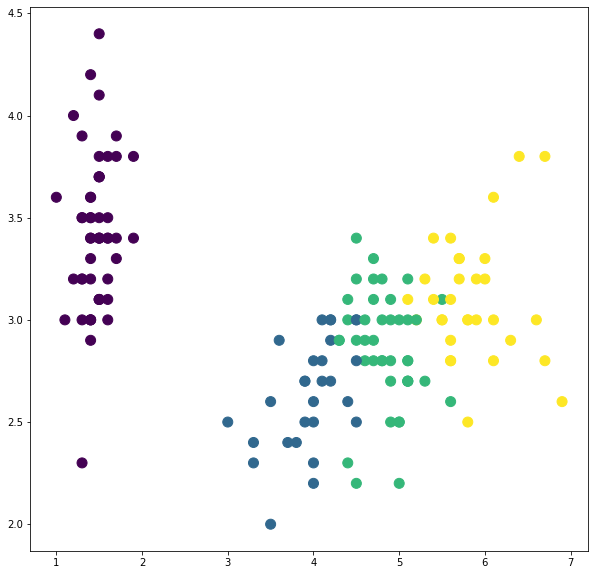

In [7]:
somsc_instance = somsc(iris['data'], 4, epouch=100);
%time somsc_instance.process();
clusters = somsc_instance.get_clusters()
labels =  [l for _, l in sorted([(c, i) for i, cl in enumerate(clusters) for c in cl])]
print("AMI=",adjusted_mutual_info_score(iris['target'], labels))
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100);